In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from Utils import plot_lost_only

In [2]:
df_houses = pd.read_csv("../Datasets/houses_to_rent_fiap.csv", delimiter=";")

## Análise exploratória de dados

In [3]:
df_houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,211,42,3300
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,1750,63,4960
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,0,41,2800
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,22,17,1112
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,25,11,800


In [4]:
df_houses.shape # Observando o tamanho do dataset

(10692, 12)

In [5]:
df_houses.info() # Observando o tipo das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   property tax (R$)    10692 non-null  int64 
 10  fire insurance (R$)  10692 non-null  int64 
 11  rent amount (R$)     10692 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1002.5+ KB


In [6]:
df_houses.isna().sum() # Observando se existe variáveis nulas

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
property tax (R$)      0
fire insurance (R$)    0
rent amount (R$)       0
dtype: int64

array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'bathroom'}>],
       [<AxesSubplot:title={'center':'parking spaces'}>,
        <AxesSubplot:title={'center':'hoa (R$)'}>,
        <AxesSubplot:title={'center':'property tax (R$)'}>],
       [<AxesSubplot:title={'center':'fire insurance (R$)'}>,
        <AxesSubplot:title={'center':'rent amount (R$)'}>,
        <AxesSubplot:>]], dtype=object)

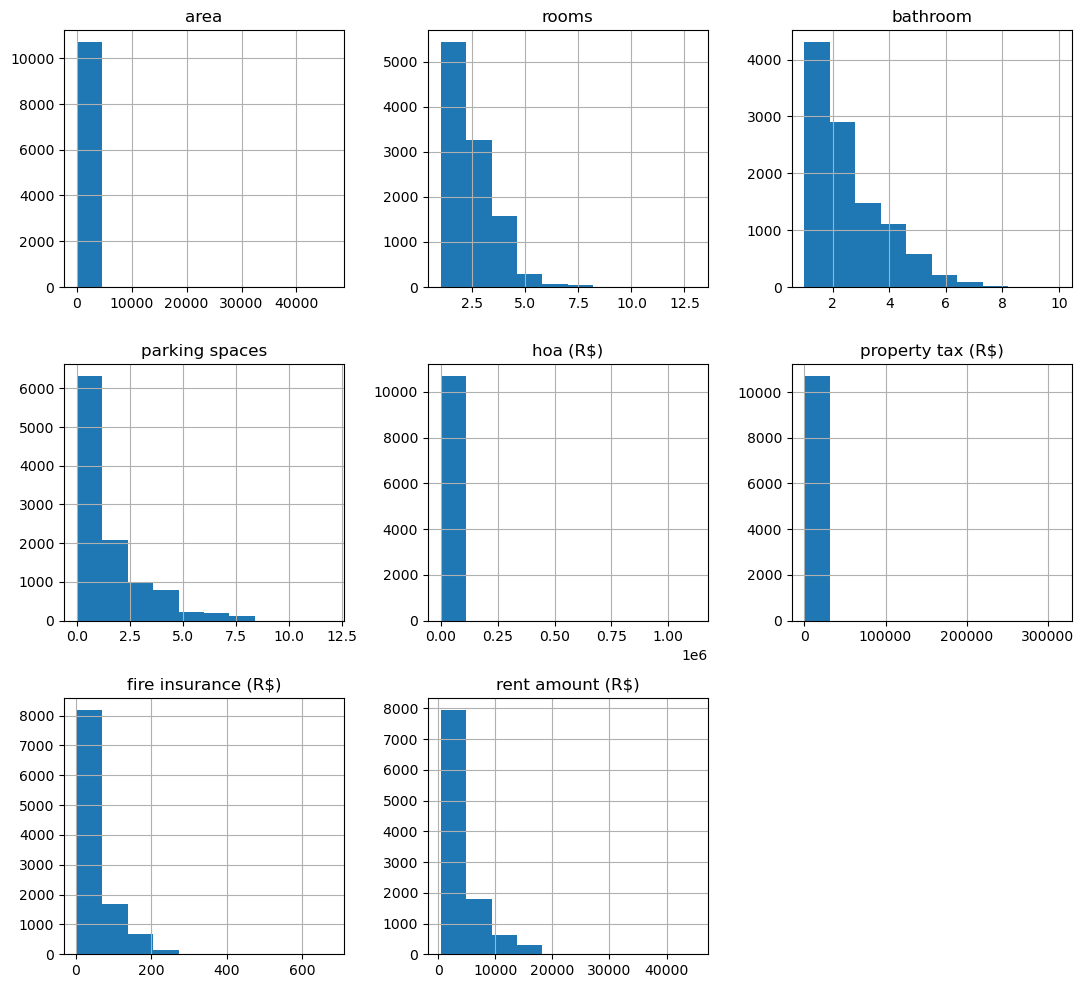

In [7]:
df_houses.hist(figsize=(13, 12)) # Observando Distribuição das variáveis

In [8]:
df_houses.describe().T # Estatística descritiva

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.0,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.0,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.0,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.0,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.0,560.0,1237.5,1117000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.0,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.0,36.0,68.0,677.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.0,2661.0,5000.0,45000.0


In [41]:
df_houses["city"].value_counts() / df_houses.shape[0] * 100  # Observando quantidade de residência por cidade

São Paulo         55.011721
Rio de Janeiro    14.045945
Belo Horizonte    11.786217
Porto Alegre      11.167370
Campinas           7.988748
Name: city, dtype: float64

<AxesSubplot:xlabel='city'>

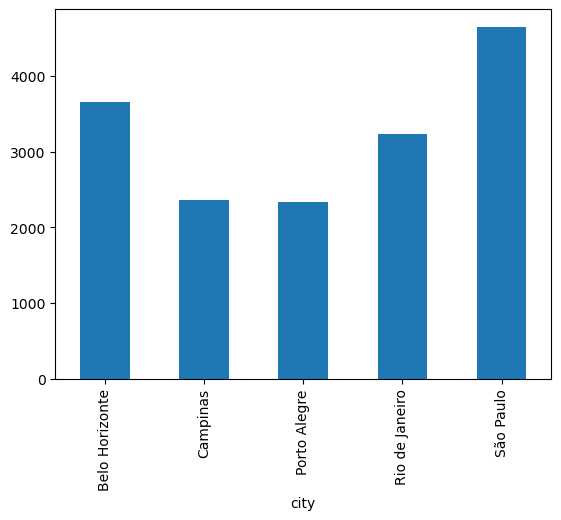

In [10]:
df_houses.groupby('city')["rent amount (R$)"].mean().plot(kind='bar') #Média do aluguel por cidade

<AxesSubplot:xlabel='floor'>

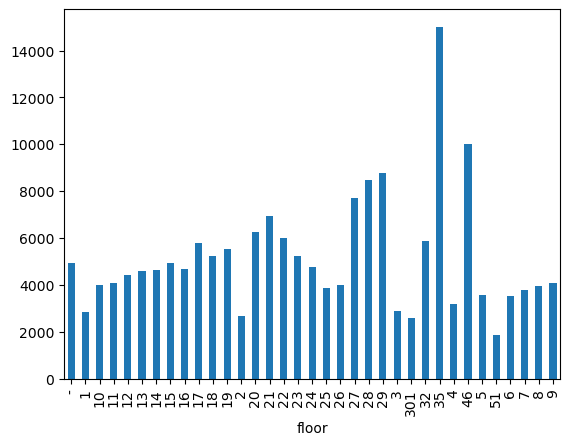

In [11]:
df_houses.groupby('floor')["rent amount (R$)"].mean().plot(kind='bar') # Média de aluguel por número do andar

<AxesSubplot:xlabel='furniture'>

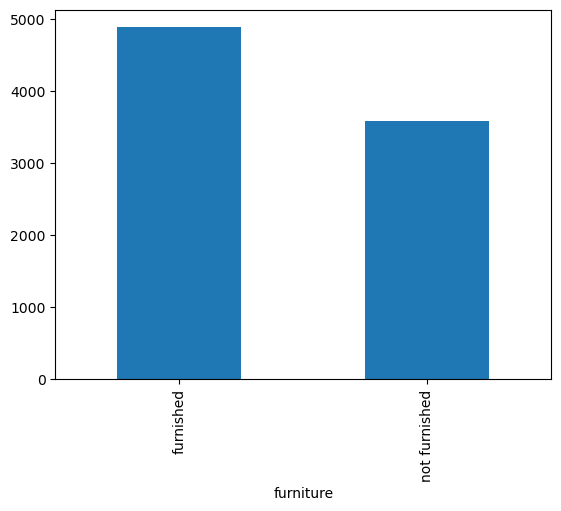

In [12]:
df_houses.groupby('furniture')["rent amount (R$)"].mean().plot(kind='bar') # Média do valor do aluguel por residência com mobiliada

In [13]:
df_houses["furniture"].value_counts()

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

<AxesSubplot:xlabel='animal'>

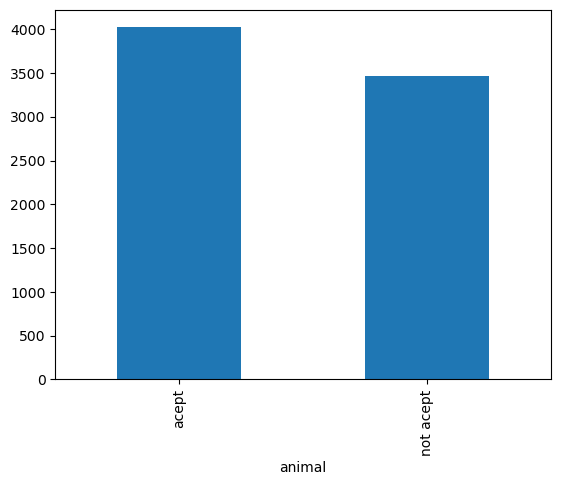

In [14]:
df_houses.groupby('animal')["rent amount (R$)"].mean().plot(kind='bar') # Média do valor de aluguel por aceitação de pet

In [15]:
(df_houses["animal"].value_counts() / df_houses.shape[0]) * 100

acept        77.777778
not acept    22.222222
Name: animal, dtype: float64

### Distribuição dos dados por boxplot (Remoção de outliers)

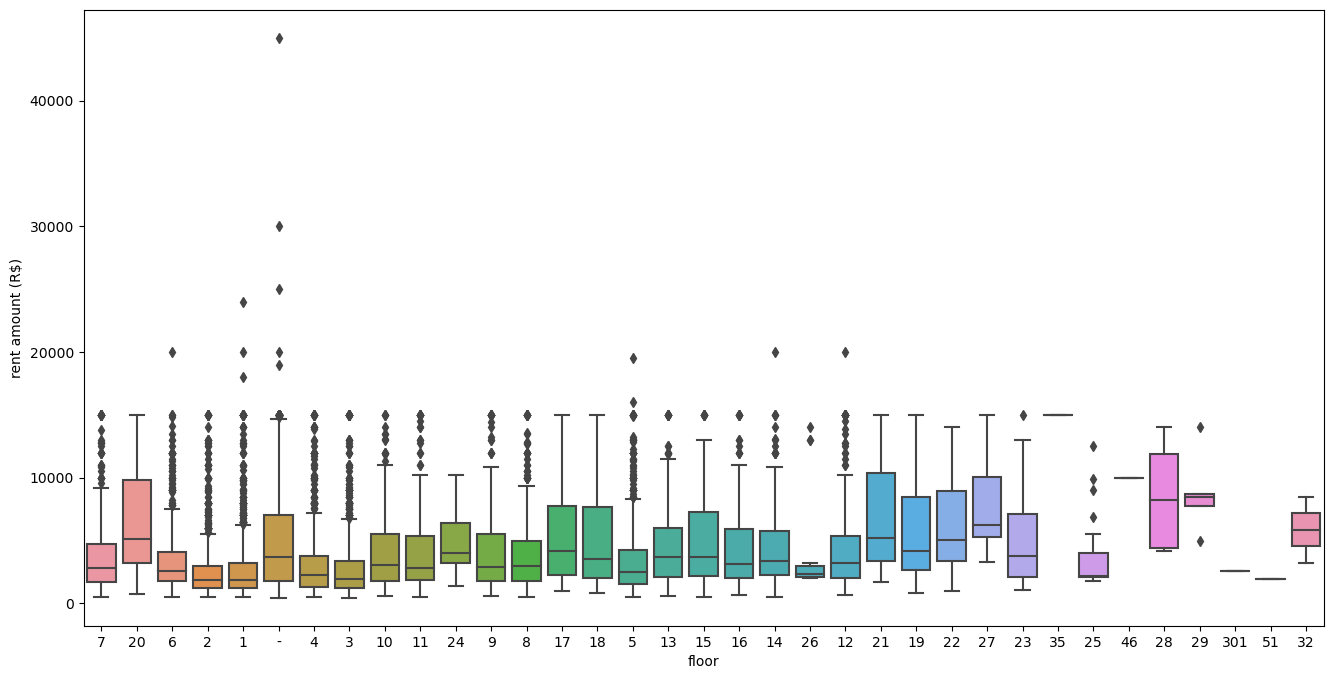

In [16]:
fig, ax = plt.subplots(figsize=(16 ,8))
sns.boxplot(ax=ax, x='floor', y='rent amount (R$)', data=df_houses)
plt.show()

<AxesSubplot:xlabel='rooms', ylabel='rent amount (R$)'>

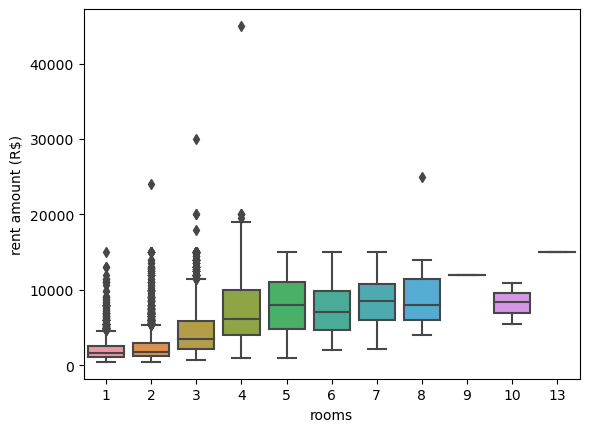

In [17]:
sns.boxplot(x='rooms', y='rent amount (R$)', data=df_houses)

<AxesSubplot:xlabel='bathroom', ylabel='rent amount (R$)'>

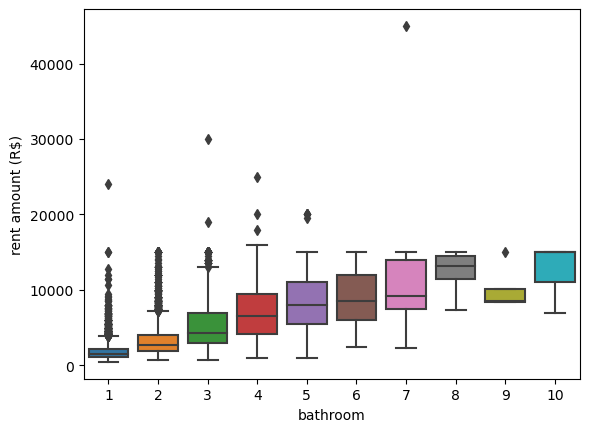

In [18]:
sns.boxplot(x='bathroom', y='rent amount (R$)', data=df_houses)

<AxesSubplot:xlabel='parking spaces', ylabel='rent amount (R$)'>

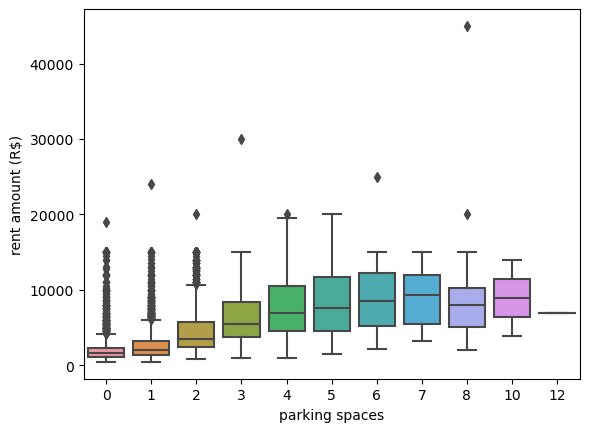

In [19]:
sns.boxplot(x='parking spaces', y='rent amount (R$)', data=df_houses)

In [20]:
df_original = df_houses.copy()

In [21]:
# Remoção de outliers de variáveis interessantes para o modelo
df_houses.drop(df_houses[(df_houses['floor'] == "301")].index, inplace=True)
df_houses.drop(df_houses[(df_houses['floor'] == "51")].index, inplace=True)
df_houses.drop(df_houses[(df_houses['floor'] == "35")].index, inplace=True)
df_houses.drop(df_houses[(df_houses['floor'] == "46")].index, inplace=True)


df_houses.drop(df_houses[(df_houses['rooms'] == 4) & (df_houses['rent amount (R$)'] >= 30000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['rooms'] == 3) & (df_houses['rent amount (R$)'] >= 30000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['rooms'] == 2) & (df_houses['rent amount (R$)'] >= 20000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['rooms'] == 9)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['rooms'] == 13)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['rooms'] == 3) & (df_houses['rent amount (R$)'] >= 17500)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['rooms'] == 1) & (df_houses['rent amount (R$)'] >= 12500)].index, inplace=True)


df_houses.drop(df_houses[(df_houses['bathroom'] == 7) & (df_houses['rent amount (R$)'] >= 30000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['bathroom'] == 5) & (df_houses['rent amount (R$)'] >= 19000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['bathroom'] == 4) & (df_houses['rent amount (R$)'] >= 19000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['bathroom'] == 3) & (df_houses['rent amount (R$)'] >= 30000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['bathroom'] == 1) & (df_houses['rent amount (R$)'] >= 20000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['bathroom'] == 1) & (df_houses['rent amount (R$)'] >= 12500)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['bathroom'] == 4) & (df_houses['rent amount (R$)'] >= 16000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['bathroom'] == 9) & (df_houses['rent amount (R$)'] >= 12000)].index, inplace=True)


df_houses.drop(df_houses[(df_houses['parking spaces'] == 12)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['parking spaces'] == 8) & (df_houses['rent amount (R$)'] >= 19000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['parking spaces'] == 6) & (df_houses['rent amount (R$)'] >= 19000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['parking spaces'] == 3) & (df_houses['rent amount (R$)'] >= 19000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['parking spaces'] == 2) & (df_houses['rent amount (R$)'] >= 19000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['parking spaces'] == 1) & (df_houses['rent amount (R$)'] >= 19000)].index, inplace=True)
df_houses.drop(df_houses[(df_houses['parking spaces'] == 0) & (df_houses['rent amount (R$)'] >= 18000)].index, inplace=True)


<AxesSubplot:xlabel='rooms', ylabel='rent amount (R$)'>

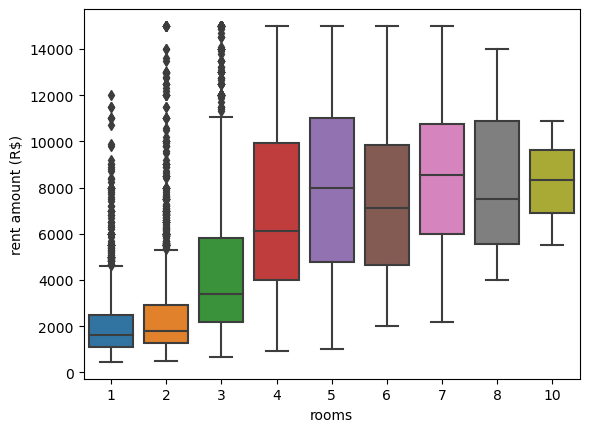

In [22]:
sns.boxplot(x='rooms', y='rent amount (R$)', data=df_houses)

<AxesSubplot:xlabel='bathroom', ylabel='rent amount (R$)'>

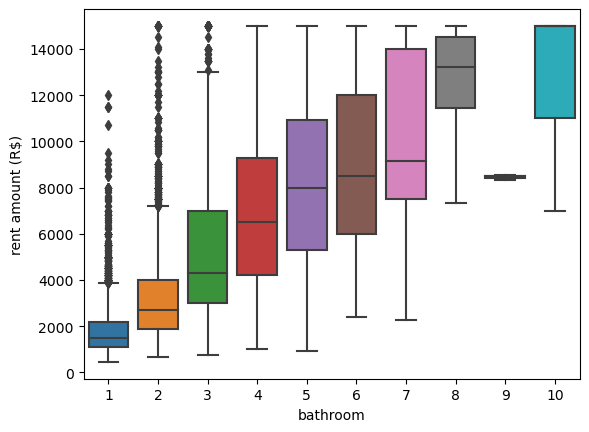

In [23]:
sns.boxplot(x='bathroom', y='rent amount (R$)', data=df_houses)

<AxesSubplot:xlabel='parking spaces', ylabel='rent amount (R$)'>

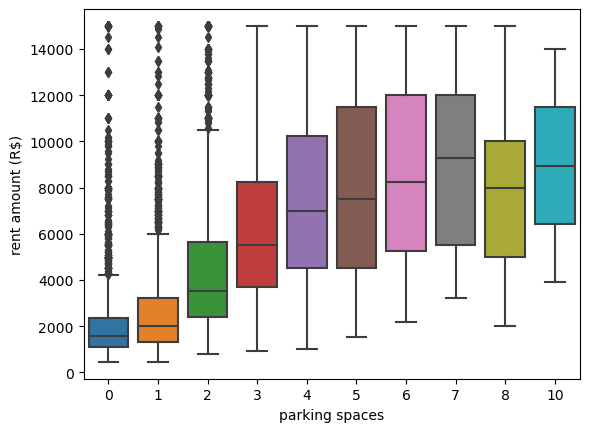

In [24]:
sns.boxplot(x='parking spaces', y='rent amount (R$)', data=df_houses)

In [25]:
# Transformando as variáveis categórias em variáveis numéricas (HOT ENCODE)
lb = LabelEncoder()

df_houses_model = df_houses.copy()

df_houses_model["city"] = lb.fit_transform(df_houses["city"])
df_houses_model["floor"] = lb.fit_transform(df_houses["floor"])
df_houses_model["animal"] = lb.fit_transform(df_houses["animal"])
df_houses_model["furniture"] = lb.fit_transform(df_houses["furniture"])

df_houses_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10665 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   city                 10665 non-null  int64
 1   area                 10665 non-null  int64
 2   rooms                10665 non-null  int64
 3   bathroom             10665 non-null  int64
 4   parking spaces       10665 non-null  int64
 5   floor                10665 non-null  int64
 6   animal               10665 non-null  int64
 7   furniture            10665 non-null  int64
 8   hoa (R$)             10665 non-null  int64
 9   property tax (R$)    10665 non-null  int64
 10  fire insurance (R$)  10665 non-null  int64
 11  rent amount (R$)     10665 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


array([[<AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'parking spaces'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'animal'}>,
        <AxesSubplot:title={'center':'furniture'}>,
        <AxesSubplot:title={'center':'hoa (R$)'}>],
       [<AxesSubplot:title={'center':'property tax (R$)'}>,
        <AxesSubplot:title={'center':'fire insurance (R$)'}>,
        <AxesSubplot:title={'center':'rent amount (R$)'}>]], dtype=object)

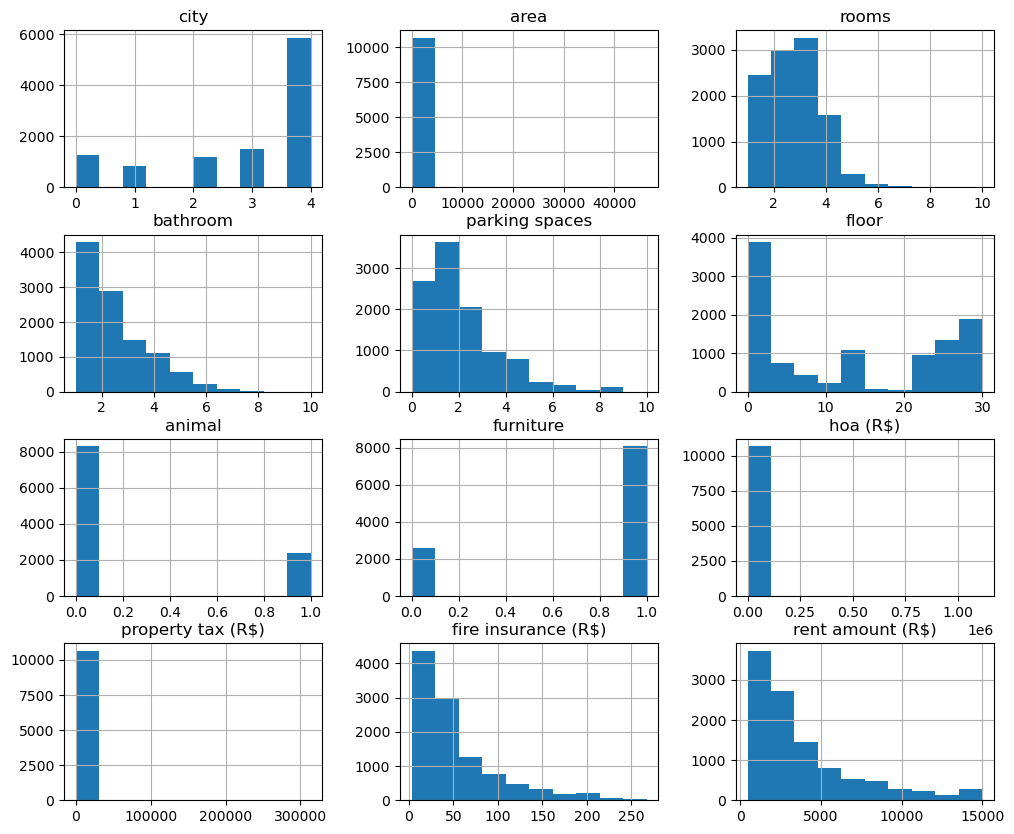

In [26]:
df_houses_model.hist(figsize=(12, 10)) # Checando a distribuição dos novos dados numéricos

<AxesSubplot:>

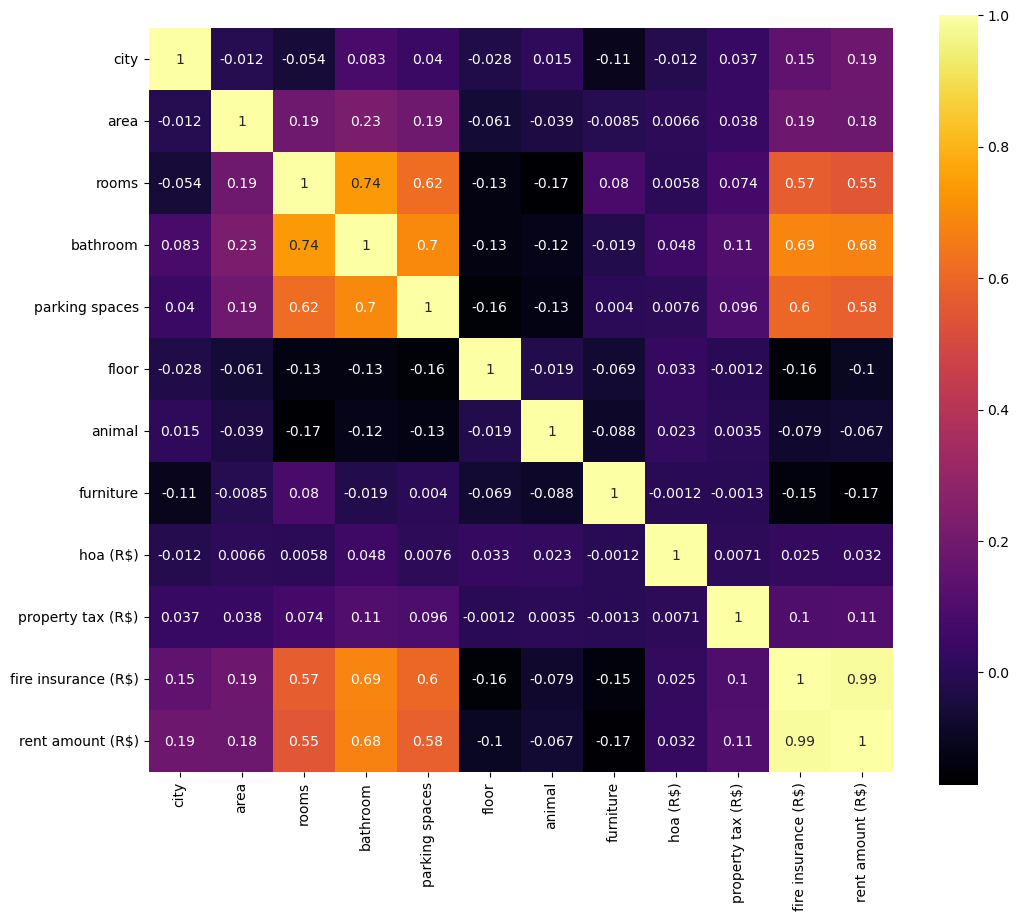

In [27]:
corr = df_houses_model.corr() # Observando a correlação entre as variáveis.
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')

## Seleção de variáveis independentes

In [28]:
# Seleção de variáveis realizada com base na correlação das mesmas e do conhecimento de negócio no mercado imobiliário
features = ["city", "area", "rooms", "bathroom", "parking spaces", "furniture", "property tax (R$)", "fire insurance (R$)"]
X = df_houses_model[features] 
y = df_houses_model[["rent amount (R$)"]]

## Preparação dos dados

In [29]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
y_test.head(10)

,rent amount (R$)
8982,1420
8894,950
4971,3000
3334,8000
8052,1920
2607,2350
6041,7000
8394,1420
7941,13500
6999,780


In [31]:
train_stats = X.describe().T

In [32]:
train_stats

,count,mean,std,min,25%,50%,75%,max
city,10665.0,2.925082,1.427122,0.0,2.0,4.0,4.0,4.0
area,10665.0,148.626442,537.307060,11.0,56.0,90.0,181.0,46335.0
rooms,10665.0,2.502579,1.164063,1.0,2.0,2.0,3.0,10.0
bathroom,10665.0,2.233380,1.404036,1.0,1.0,2.0,3.0,10.0
parking spaces,10665.0,1.603844,1.581828,0.0,0.0,1.0,2.0,10.0
furniture,10665.0,0.756493,0.429218,0.0,1.0,1.0,1.0,1.0
property tax (R$),10665.0,363.798312,3109.465110,0.0,38.0,125.0,375.0,313700.0
fire insurance (R$),10665.0,52.839662,46.518354,3.0,21.0,36.0,67.0,267.0


In [33]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [34]:
# Normalização dos dados para acelerar o processo de aprendizagem, mantendo os dados em uma escala semelhante
normed_train_data = norm(X_train)
normed_train_data = normed_train_data.to_numpy()

normed_test_data = norm(X_test)
normed_test_data = normed_test_data.to_numpy()

## Criação do modelo

In [35]:
# Criação da camada densa. Valores dos neurônios foram iniciados sem critério.
# A camada de output com apenas 1 nerônio com o resultado da regressão
# *OBS: Foram realizados testes com configurações diferentes da rede. A configuração abaixo, foi a que apresentou melhor desempenho
model_1 =  Sequential(
    [
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(1)
    ]
)
"""
    Mean absolute error (MAE) selecionada para função loss
    Optimizador Adam foi selecionado por ser bem semelhante com o gradiente descendente (visto em aula)
    Learning rate atribuido ao Adam para melhor optimização.
"""
model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['mse']
)

"""
    750 épocas parece um valor razoável, tendo observado a diminuição do loss em testes anteriores.
    Dados de teste foram passados para validar generalização do modelo.
"""
history_1 = model_1.fit(
    normed_train_data, y_train,
    epochs=750,
    validation_data=(normed_test_data, y_test)
)

Epoch 1/750


2022-10-27 00:49:46.581685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


267/267 [==============================] - 1s 1ms/step - loss: 3683.8345 - mse: 24405966.0000 - val_loss: 3357.1953 - val_mse: 22394204.0000
Epoch 2/750
267/267 [==============================] - 0s 929us/step - loss: 2458.8704 - mse: 13616861.0000 - val_loss: 1713.0927 - val_mse: 7339363.5000
Epoch 3/750
267/267 [==============================] - 0s 865us/step - loss: 1303.8049 - mse: 4075961.2500 - val_loss: 1161.7780 - val_mse: 4476029.5000
Epoch 4/750
267/267 [==============================] - 0s 913us/step - loss: 970.0618 - mse: 2314559.0000 - val_loss: 864.8662 - val_mse: 2619442.5000
Epoch 5/750
267/267 [==============================] - 0s 1ms/step - loss: 692.7134 - mse: 1180228.5000 - val_loss: 595.2255 - val_mse: 1243877.3750
Epoch 6/750
267/267 [==============================] - 0s 1ms/step - loss: 494.8154 - mse: 647321.5625 - val_loss: 441.3165 - val_mse: 651563.5000
Epoch 7/750
267/267 [==============================] - 0s 1ms/step - loss: 384.8504 - mse: 506409.8750 - 

## Desempenho do modelo

In [36]:
def show_tail_epochs(hist):
    df_hist = pd.DataFrame(hist.history)
    df_hist['epoch'] = hist.epoch
    df_hist["mse_sqrt"] = np.sqrt(df_hist["mse"]) 
    return df_hist.tail(10)


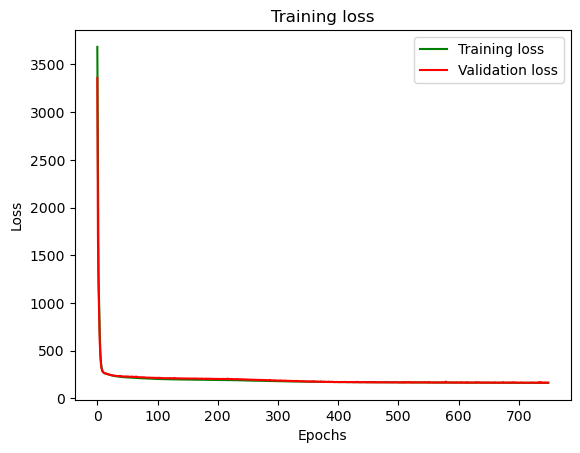

In [37]:
# Comparando o loss entre os dados de treino e validação
plot_lost_only(history_1)

In [38]:
show_tail_epochs(history_1)

,loss,mse,val_loss,val_mse,epoch,mse_sqrt
740,162.555679,176799.421875,163.240967,207451.890625,740,420.475233
741,162.241257,175962.375000,165.588272,211167.281250,741,419.478694
742,162.674637,177626.781250,164.734116,211890.390625,742,421.457923
743,162.234238,175319.328125,166.932373,214623.781250,743,418.711509
744,163.010040,175636.468750,164.018036,208724.640625,744,419.090048
745,162.354401,176067.343750,166.380264,212447.828125,745,419.603794
746,162.783173,176163.000000,163.521896,208812.125000,746,419.717762
747,162.400177,176106.484375,164.232040,210383.546875,747,419.650431
748,162.190048,175863.906250,163.977600,211242.671875,748,419.361308
749,163.037384,176435.390625,165.780853,212644.343750,749,420.042130


In [39]:
y_hat = model_1.predict(normed_test_data)
y_hat

67/67 [==============================] - 0s 511us/step


array([[1373.3289],
       [1114.6533],
       [2960.9824],
       ...,
       [4933.3286],
       [1034.5432],
       [1336.2075]], dtype=float32)

In [43]:
# Comparando o y real do y predito
df_compare = pd.DataFrame()

df_compare["y_test"] = y_test
df_compare["y_hat"] = np.round(y_hat.tolist())
df_compare["diff"] = df_compare["y_test"] - df_compare["y_hat"]  

df_compare.head(20)

,y_test,y_hat,diff
8982,1420,1373.0,47.0
8894,950,1115.0,-165.0
4971,3000,2961.0,39.0
3334,8000,8707.0,-707.0
8052,1920,1948.0,-28.0
2607,2350,2333.0,17.0
6041,7000,7002.0,-2.0
8394,1420,1377.0,43.0
7941,13500,13549.0,-49.0
6999,780,784.0,-4.0


## Conclusão

Após a retirada dos outliers de algumas variáveis, o modelo fez boas predições com a configuração da rede neural selecionada.